In [1]:
# Import cell
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import load
import html

In [2]:
tweets = load()
tweets

,sentiment,ids,date,flag,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...
...,...,...,...,...,...,...
224989,0,2261324310,Sat Jun 20 20:36:48 PDT 2009,NO_QUERY,CynthiaBuroughs,@Dropsofreign yeah I hope Iran people reach fr...
224990,1,1989408152,Mon Jun 01 01:25:45 PDT 2009,NO_QUERY,unitechy,Trying the qwerty keypad
224991,0,1991221316,Mon Jun 01 06:38:10 PDT 2009,NO_QUERY,Xaan,I love Jasper &amp; Jackson but that wig in th...
224992,0,2239702807,Fri Jun 19 08:51:56 PDT 2009,NO_QUERY,Ginger_Billie,I am really tired and bored and bleh! I feel c...


In [3]:
tweets.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,sentiment,ids
sentiment,1.0,-0.24
ids,-0.24,1.0


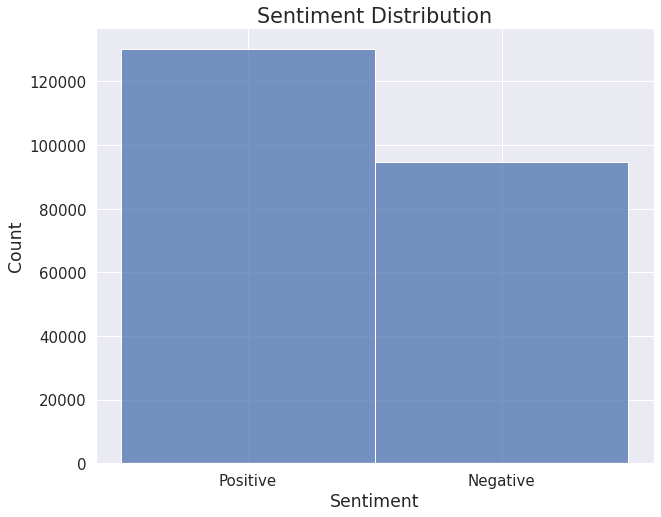

In [4]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(figsize=(10, 8))

d = {0: "Negative", 1:"Positive"}
sns.histplot(data= tweets["sentiment"].apply(lambda x: d[x]),ax=ax)

plt.title("Sentiment Distribution", fontdict={"fontsize": "xx-large"})

plt.xlabel("Sentiment", fontdict={"fontsize": "x-large"})
plt.ylabel("Count", fontdict={"fontsize": "x-large"})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#fig.savefig("./report/figures/room.svg", format='svg')

plt.show()

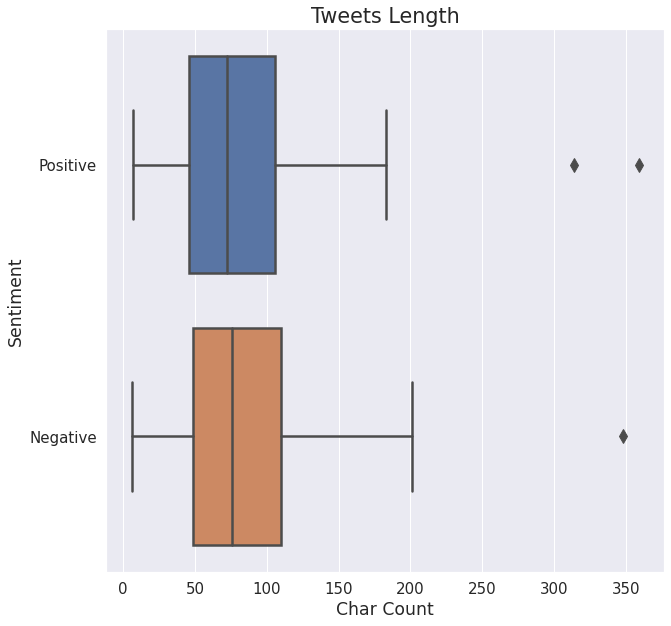

In [5]:
tweets["text"] = tweets["text"].apply(lambda x : html.unescape(x))
tweets['char_count'] = list(map(lambda x: len(x), tweets['text'])) 


fig, ax = plt.subplots(figsize=(10, 10))
d = {0: "Negative", 1:"Positive"}

sns.boxplot(data=tweets, x = "char_count", y = tweets["sentiment"].apply(lambda x: d[x]), orient='h', ax= ax, linewidth=2.5, fliersize=10)


plt.title("Tweets Length", fontdict={"fontsize": "xx-large"})

plt.xlabel("Char Count", fontdict={"fontsize": "x-large"})
plt.ylabel("Sentiment", fontdict={"fontsize": "x-large"})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#fig.savefig("./report/figures/room.svg", format='svg')

plt.show()